In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"].isna())]
top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
7,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,4.001267,2711.0,13268.0,4.0,24.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273672,KR_6375996445,Red,anonymous 21,kr,Sion,34.009733,7550.0,7106.0,17.0,219.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273673,KR_6375996445,Red,anonymous 21,kr,Sion,35.009817,10388.0,13518.0,18.0,229.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273677,KR_6375996445,Red,anonymous 21,kr,Sion,36.009950,1858.0,5268.0,18.0,237.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273679,KR_6375996445,Red,anonymous 21,kr,Sion,37.010150,2453.0,2976.0,18.0,238.0,...,618.0,1990.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP


Champions' winrates

In [4]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Jax,0.53,119.0
Jayce,0.53,116.0
LeeSin,0.57,84.0
Gragas,0.49,41.0
Gnar,0.58,38.0
...,...,...
Lillia,0.00,1.0
Viego,0.00,1.0
Vi,0.00,1.0


In [8]:
print("This dataset contains {} matches in which the top died at least once".format(len(np.unique(top_deaths_df["gameId"]))))

This dataset contains 836 matches in which the top died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(top_deaths_df["summoner"])), top_deaths_df.shape[0]))

17 players died a total of 22075 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((top_deaths_df.shape[0]/len(np.unique(top_deaths_df["gameId"])))))

This Dataset contains an average of 26.4055023923445 deaths per game


In [11]:
blueSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
blueSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
7,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,4.001267,2711.0,13268.0,4.0,24.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273544,KR_6376015376,Blue,anonymous 20,kr,Sion,27.007217,6197.0,1176.0,16.0,226.0,...,11.0,7691.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273545,KR_6376015376,Blue,anonymous 20,kr,Sion,28.007767,2442.0,2669.0,16.0,229.0,...,11.0,9222.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273546,KR_6376015376,Blue,anonymous 20,kr,Sion,29.007900,2313.0,1651.0,16.0,234.0,...,12.0,10140.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273549,KR_6376015376,Blue,anonymous 20,kr,Sion,30.008167,6135.0,1973.0,17.0,236.0,...,321.0,11750.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [12]:
gamesBlueSide = len(np.unique(blueSide_top_deaths_df["gameId"]))
gamesBlueSide

378

In [13]:
players_df = np.unique(blueSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_top_deaths_df[blueSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 10 played 14 matches
anonymous 11 played 16 matches
anonymous 13 played 7 matches
anonymous 14 played 9 matches
anonymous 15 played 37 matches
anonymous 16 played 32 matches
anonymous 17 played 26 matches
anonymous 18 played 4 matches
anonymous 19 played 31 matches
anonymous 2 played 34 matches
anonymous 20 played 24 matches
anonymous 21 played 21 matches
anonymous 3 played 17 matches
anonymous 4 played 33 matches
anonymous 5 played 34 matches
anonymous 7 played 28 matches
anonymous 9 played 11 matches


In [14]:
print("Blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSide_top_deaths_df["gameId"]))))

Blue side contains 378 matches in which the top died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_top_deaths_df["summoner"])), blueSide_top_deaths_df.shape[0]))

17 players died a total of 10021 times on the blue side


In [16]:
redSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Red"]
redSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
54,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,0.000000,14180.0,14271.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
55,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,1.000433,4642.0,7703.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
56,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,2.000917,1901.0,12973.0,1.0,3.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
58,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,3.001300,1781.0,11078.0,3.0,15.0,...,110.0,157.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
61,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,4.001717,4322.0,13187.0,4.0,24.0,...,110.0,253.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273672,KR_6375996445,Red,anonymous 21,kr,Sion,34.009733,7550.0,7106.0,17.0,219.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273673,KR_6375996445,Red,anonymous 21,kr,Sion,35.009817,10388.0,13518.0,18.0,229.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273677,KR_6375996445,Red,anonymous 21,kr,Sion,36.009950,1858.0,5268.0,18.0,237.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273679,KR_6375996445,Red,anonymous 21,kr,Sion,37.010150,2453.0,2976.0,18.0,238.0,...,618.0,1990.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [17]:
gamesRedSide = len(np.unique(redSide_top_deaths_df["gameId"]))
gamesRedSide

463

In [18]:
players_df = np.unique(redSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 10 played 24 matches
anonymous 11 played 24 matches
anonymous 13 played 9 matches
anonymous 14 played 19 matches
anonymous 15 played 38 matches
anonymous 16 played 42 matches
anonymous 17 played 34 matches
anonymous 18 played 13 matches
anonymous 19 played 48 matches
anonymous 2 played 24 matches
anonymous 20 played 30 matches
anonymous 21 played 18 matches
anonymous 3 played 21 matches
anonymous 4 played 40 matches
anonymous 5 played 37 matches
anonymous 7 played 26 matches
anonymous 9 played 16 matches


In [19]:
print("Red side contains {} matches in which the top died at least once".format(len(np.unique(redSide_top_deaths_df["gameId"]))))

Red side contains 463 matches in which the top died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_top_deaths_df["summoner"])), redSide_top_deaths_df.shape[0]))

17 players died a total of 12054 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [82]:
redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
465,EUW1_6272437680,Red,anonymous 3,euw1,Gwen,0.000000,14180.0,14271.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
466,EUW1_6272437680,Red,anonymous 3,euw1,Gwen,1.000383,11296.0,14172.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
467,EUW1_6272437680,Red,anonymous 3,euw1,Gwen,2.000917,1946.0,11773.0,1.0,3.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
469,EUW1_6272437680,Red,anonymous 3,euw1,Gwen,3.001350,2283.0,12213.0,3.0,12.0,...,164.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
472,EUW1_6272437680,Red,anonymous 3,euw1,Gwen,4.001500,1763.0,11479.0,4.0,20.0,...,164.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273672,KR_6375996445,Red,anonymous 21,kr,Sion,34.009733,7550.0,7106.0,17.0,219.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273673,KR_6375996445,Red,anonymous 21,kr,Sion,35.009817,10388.0,13518.0,18.0,229.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273677,KR_6375996445,Red,anonymous 21,kr,Sion,36.009950,1858.0,5268.0,18.0,237.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273679,KR_6375996445,Red,anonymous 21,kr,Sion,37.010150,2453.0,2976.0,18.0,238.0,...,618.0,1990.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [83]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [84]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [85]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

58.09935205183585

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

56.86079309772689

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 won 13 matches on the red side
anonymous 10 has an average of 28.692307692307693 deaths per game when winning on the red side

anonymous 11 won 16 matches on the red side
anonymous 11 has an average of 23.6875 deaths per game when winning on the red side

anonymous 13 won 5 matches on the red side
anonymous 13 has an average of 23.8 deaths per game when winning on the red side

anonymous 14 won 13 matches on the red side
anonymous 14 has an average of 23.384615384615383 deaths per game when winning on the red side

anonymous 15 won 18 matches on the red side
anonymous 15 has an average of 25.11111111111111 deaths per game when winning on the red side

anonymous 16 won 22 matches on the red side
anonymous 16 has an average of 26.727272727272727 deaths per game when winning on the red side

anonymous 17 won 24 matches on the red side
anonymous 17 has an average of 24.291666666666668 deaths per game when winning on the red side

anonymous 18 won 7 matches on the red side
anon

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 269 matches in which the jungler died at least once
17 players died a total of 6854 times on the red side
Victory games on red side contains an average of 25.479553903345725 deaths per game


In [86]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
465,14180.0,14271.0,0.000000
466,11296.0,14172.0,1.000383
467,1946.0,11773.0,2.000917
469,2283.0,12213.0,3.001350
472,1763.0,11479.0,4.001500
...,...,...,...
273672,7550.0,7106.0,34.009733
273673,10388.0,13518.0,35.009817
273677,1858.0,5268.0,36.009950
273679,2453.0,2976.0,37.010150


Time discretization

In [87]:
df3 = redSideVictory_df.copy()
df3["timestamp"] = df3["timestamp"].apply(float)
df3

,coordinate_x,coordinate_y,timestamp
465,14180.0,14271.0,0.000000
466,11296.0,14172.0,1.000383
467,1946.0,11773.0,2.000917
469,2283.0,12213.0,3.001350
472,1763.0,11479.0,4.001500
...,...,...,...
273672,7550.0,7106.0,34.009733
273673,10388.0,13518.0,35.009817
273677,1858.0,5268.0,36.009950
273679,2453.0,2976.0,37.010150


In [88]:
redSideVictory_df["timestamp"] = pd.cut(df3["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [89]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

In [90]:
np.unique(redSideVictory_df["timestamp"])

array([-1,  0,  1])

Normalize Data:

In [91]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [92]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
465,2.050303,1.054145,-1
466,1.364982,1.029299,-1
467,-0.856843,0.427229,-1
469,-0.776762,0.537654,-1
472,-0.900329,0.353444,-1
...,...,...,...
273672,0.474827,-0.744035,1
273673,1.149216,0.865166,1
273677,-0.877754,-1.205313,1
273679,-0.736365,-1.780530,1


In [63]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.45917242907169475
Silhouette score for k=3: 0.5425010832361108
Silhouette score for k=4: 0.5160934738836098
Silhouette score for k=5: 0.48573810404942996
Silhouette score for k=6: 0.4804409705680357
Silhouette score for k=7: 0.38855689774793517
Silhouette score for k=8: 0.3939319126062858
Silhouette score for k=9: 0.4011357669659886
Silhouette score for k=10: 0.40395378442027097
Silhouette score for k=11: 0.41311685229671324
Silhouette score for k=12: 0.41414588242012096
Silhouette score for k=13: 0.41925999918408924
Silhouette score for k=14: 0.4277511338403782
Silhouette score for k=15: 0.42610719732127667
Silhouette score for k=16: 0.4304849945044091
Silhouette score for k=17: 0.42013865617382906
Silhouette score for k=18: 0.42938155426806596
Silhouette score for k=19: 0.4288706384505115
Silhouette score for k=20: 0.4333204895876888
Silhouette score for k=25: 0.43537632895862355


K-Means with k = 3

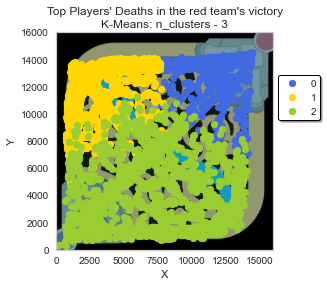

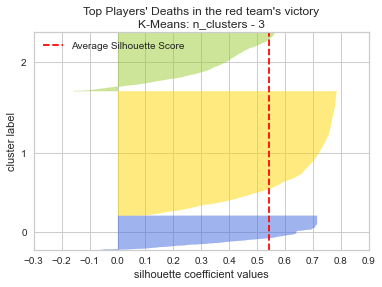

Silhouette score: 0.5425010832361108
1    3936
2    1835
0    1083
Name: cluster, dtype: int64

Inertia: 5403.3364191692135

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12554.603878,13341.420129,-0.538319
1,1,2920.909553,11839.290650,-0.806402
2,2,7061.999455,4346.691008,0.234332


In [99]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [100]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2010.356449,1619.412497,0.630964
1,1,1480.989378,1583.811984,0.421259
2,2,3603.830481,2566.549811,0.586514


In [101]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14398.0,6890.0,14582.0,5939.0,1,-1
1,1,8106.0,724.0,14108.0,4882.0,1,-1
2,2,14091.0,236.0,11280.0,281.0,1,-1


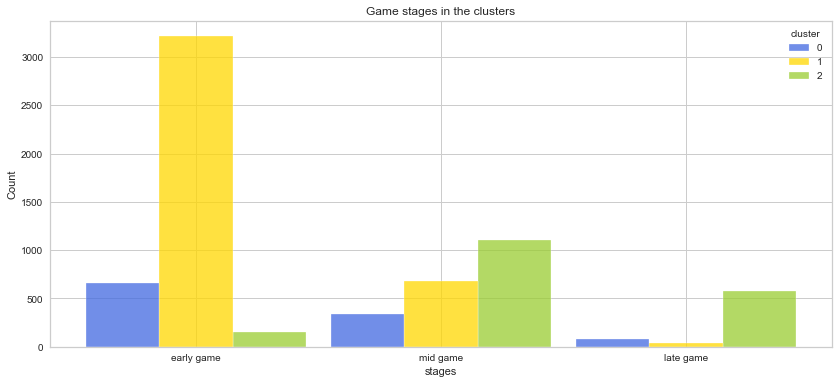

In [102]:
stagesPerClusterV2(redSideVictory_df, colors)

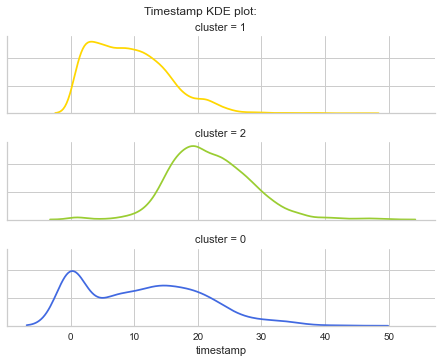

In [103]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

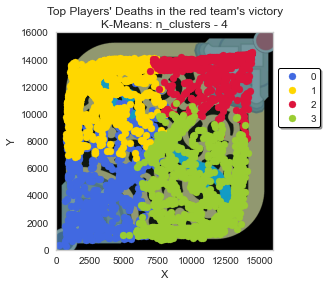

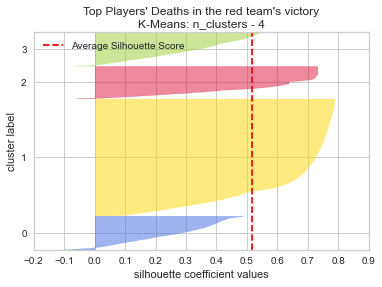

Silhouette score: 0.5160934738836098
1    3710
0    1072
3    1045
2    1027
Name: cluster, dtype: int64

Inertia: 4264.468788160923

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3537.550373,5439.083955,0.381530
1,1,2956.778167,12038.744474,-0.862803
2,2,12607.577410,13578.155794,-0.563778
3,3,9896.863158,4387.730144,0.042105


In [94]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [95]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1953.162584,2943.917214,0.520973
1,1,1476.178754,1378.204038,0.354853
2,2,1992.008753,1226.400167,0.624533
3,3,2174.363767,2622.729946,0.562077


In [96]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8030.0,236.0,12655.0,281.0,1,-1
1,1,8106.0,724.0,14108.0,6778.0,1,-1
2,2,14398.0,6890.0,14582.0,8263.0,1,-1
3,3,14113.0,4908.0,10827.0,757.0,1,-1


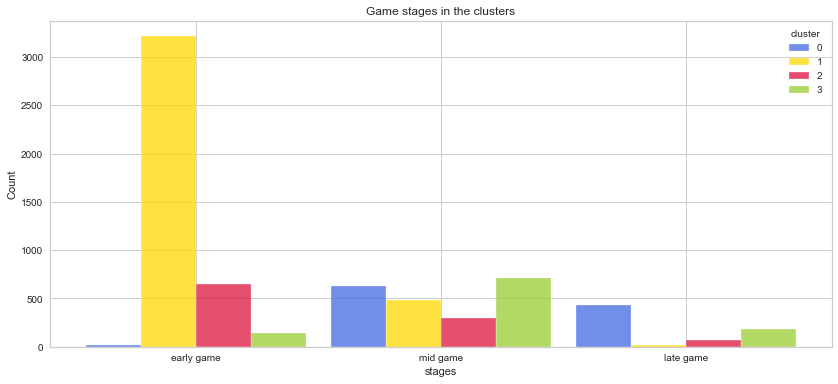

In [97]:
stagesPerClusterV2(redSideVictory_df, colors)

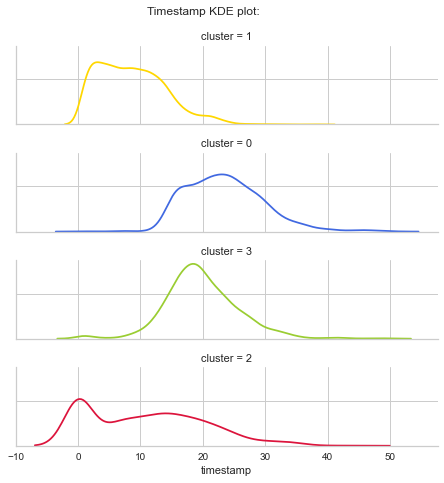

In [98]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [69]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Jax,38
Jayce,29
LeeSin,28
Gnar,17
Gragas,16
KSante,13
Irelia,12
Sion,11
Gangplank,11
Gwen,9


Deaths with each champion:

In [70]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jax           985
LeeSin        756
Jayce         710
Gnar          427
Gragas        352
KSante        305
Irelia        298
Gangplank     295
Sion          285
Renekton      234
Gwen          214
Fiora         184
Olaf          147
Darius        136
Kayle         136
Kled          135
Camille       114
Garen         111
Cassiopeia    100
Malphite       86
Alistar        80
Lucian         69
Yone           63
Vayne          56
Akshan         55
JarvanIV       53
Kennen         37
Akali          35
Vladimir       33
Shen           32
Udyr           31
Graves         31
Aatrox         30
Illaoi         30
Rumble         29
Shyvana        27
Warwick        26
Quinn          26
Leblanc        23
Sylas          22
Tryndamere     22
Pantheon       17
Nautilus       17
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [71]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 43 champions when they won on the red side

Cluster 0 - died with 43 champions:
 ['Aatrox' 'Akali' 'Akshan' 'Alistar' 'Camille' 'Cassiopeia' 'Darius'
 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Gragas' 'Graves' 'Gwen' 'Illaoi'
 'Irelia' 'JarvanIV' 'Jax' 'Jayce' 'KSante' 'Kayle' 'Kennen' 'Kled'
 'Leblanc' 'LeeSin' 'Lucian' 'Malphite' 'Nautilus' 'Olaf' 'Pantheon'
 'Quinn' 'Renekton' 'Rumble' 'Shen' 'Shyvana' 'Sion' 'Sylas' 'Tryndamere'
 'Udyr' 'Vayne' 'Vladimir' 'Warwick' 'Yone']
Jax           161
LeeSin        124
Jayce         110
Gnar           74
Gragas         52
KSante         51
Gangplank      47
Sion           45
Irelia         44
Renekton       35
Gwen           33
Darius         31
Fiora          28
Kayle          24
Olaf           17
Cassiopeia     17
Kled           16
Garen          15
Camille        15
Malphite       14
Yone           14
JarvanIV       12
Akshan         10
Lucian         10
Alistar        10
Vayne           8
Sylas           5
Vladimir  

---
### Clustering Red Team Defeat

In [104]:
redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
54,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,0.000000,14180.0,14271.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
55,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,1.000433,4642.0,7703.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
56,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,2.000917,1901.0,12973.0,1.0,3.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
58,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,3.001300,1781.0,11078.0,3.0,15.0,...,110.0,157.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
61,EUW1_6272332377,Red,anonymous 2,euw1,Tristana,4.001717,4322.0,13187.0,4.0,24.0,...,110.0,253.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273099,KR_6376092941,Red,anonymous 19,kr,Jayce,16.004533,4627.0,12392.0,9.0,74.0,...,0.0,2838.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273102,KR_6376092941,Red,anonymous 19,kr,Jayce,17.004867,4388.0,14002.0,9.0,81.0,...,0.0,3165.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273105,KR_6376092941,Red,anonymous 19,kr,Jayce,18.005083,14237.0,14256.0,9.0,86.0,...,0.0,3165.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273106,KR_6376092941,Red,anonymous 19,kr,Jayce,19.005517,7542.0,13744.0,10.0,94.0,...,0.0,3165.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [105]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [106]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

43.1392069022731

In [75]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 lost 11 matches on the red side
anonymous 10 has an average of 26.727272727272727 deaths per game when losing on the red side

anonymous 11 lost 8 matches on the red side
anonymous 11 has an average of 26.375 deaths per game when losing on the red side

anonymous 13 lost 4 matches on the red side
anonymous 13 has an average of 20.75 deaths per game when losing on the red side

anonymous 14 lost 6 matches on the red side
anonymous 14 has an average of 22.666666666666668 deaths per game when losing on the red side

anonymous 15 lost 20 matches on the red side
anonymous 15 has an average of 25.6 deaths per game when losing on the red side

anonymous 16 lost 20 matches on the red side
anonymous 16 has an average of 25.8 deaths per game when losing on the red side

anonymous 17 lost 10 matches on the red side
anonymous 17 has an average of 27.6 deaths per game when losing on the red side

anonymous 18 lost 6 matches on the red side
anonymous 18 has an average of 29.333333333333

In [76]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 194 matches in which the jungler died at least once
17 players died a total of 5200 times on the red side
Defeat games on red side contains an average of 26.804123711340207 deaths per game


In [107]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
54,14180.0,14271.0,0.000000
55,4642.0,7703.0,1.000433
56,1901.0,12973.0,2.000917
58,1781.0,11078.0,3.001300
61,4322.0,13187.0,4.001717
...,...,...,...
273099,4627.0,12392.0,16.004533
273102,4388.0,14002.0,17.004867
273105,14237.0,14256.0,18.005083
273106,7542.0,13744.0,19.005517


Time discretization

In [108]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].apply(float)
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [109]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [110]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [111]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [112]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
54,1.714783,1.014250,-1
55,-0.411145,-0.892724,-1
56,-1.022087,0.637385,-1
58,-1.048834,0.087184,-1
61,-0.482470,0.699518,-1
...,...,...,...
273099,-0.414488,0.468695,0
273102,-0.467759,0.936148,0
273105,1.727488,1.009895,0
273106,0.235237,0.861239,0


In [113]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4678198840475515
Silhouette score for k=3: 0.5206085065822432
Silhouette score for k=4: 0.4818269099401867
Silhouette score for k=5: 0.48183545862099053
Silhouette score for k=6: 0.46500742581449317
Silhouette score for k=7: 0.46439358057220487
Silhouette score for k=8: 0.3930952395372305
Silhouette score for k=9: 0.40636005326185015
Silhouette score for k=10: 0.41576419678914617
Silhouette score for k=11: 0.4214397447961343
Silhouette score for k=12: 0.42501524451093964
Silhouette score for k=13: 0.4259379694637034
Silhouette score for k=14: 0.42338234704172123
Silhouette score for k=15: 0.4297866605759385
Silhouette score for k=16: 0.4403493349743588
Silhouette score for k=17: 0.4384702401465536
Silhouette score for k=18: 0.4429215339323325
Silhouette score for k=19: 0.41887574787496656
Silhouette score for k=20: 0.4228713885362535
Silhouette score for k=25: 0.43656635014347767


K-Means with k = 3

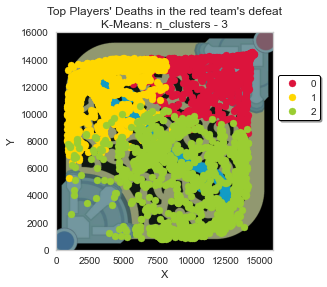

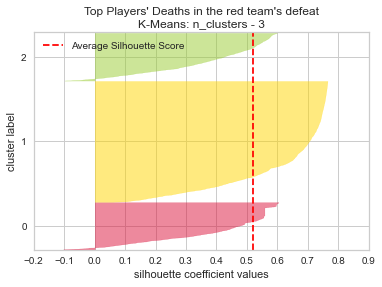

Silhouette score: 0.5206085065822432
1    2911
2    1151
0    1138
Name: cluster, dtype: int64

Inertia: 4201.714514438243

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12126.245167,13100.099297,-0.167838
1,1,3059.435589,12031.464789,-0.791824
2,2,9578.341442,5310.716768,0.213727


In [114]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [115]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2334.449429,1494.634289,0.773543
1,1,1550.216197,1458.296819,0.444766
2,2,2959.955024,2609.471896,0.583157


In [116]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14545.0,5623.0,14582.0,8621.0,1,-1
1,1,8517.0,777.0,14106.0,5318.0,1,-1
2,2,14138.0,878.0,10552.0,762.0,1,-1


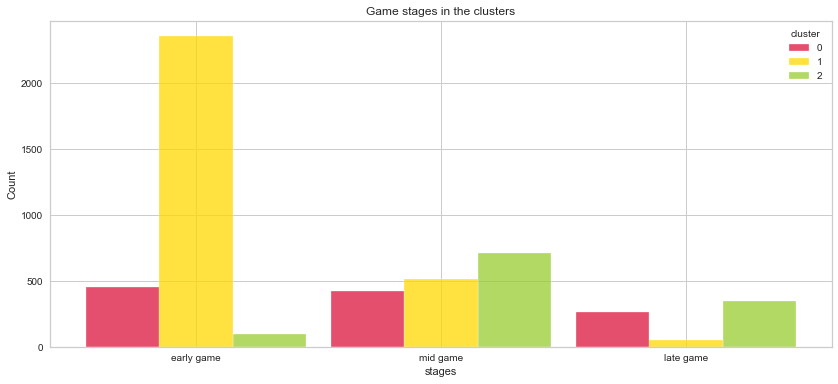

In [117]:
stagesPerClusterV2(redSideDefeat_df, colors)

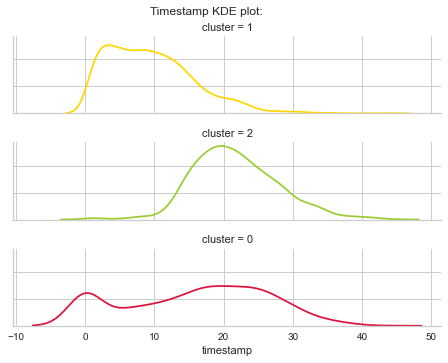

In [118]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [121]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Jayce,29
Jax,28
LeeSin,15
Irelia,13
Gragas,10
Renekton,10
Gnar,10
Gangplank,8
Fiora,7
KSante,6


Deaths with each champion:

In [122]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce          794
Jax            741
LeeSin         371
Irelia         333
Gragas         274
Renekton       270
Gnar           265
Gangplank      247
Fiora          193
Gwen           142
KSante         134
Darius         131
Sion           129
Yone            93
Kennen          85
Cassiopeia      80
Camille         76
Akshan          73
Olaf            62
Yasuo           59
Ornn            51
Sett            50
Quinn           45
Nasus           38
Leblanc         36
Lucian          35
Vayne           34
Malphite        32
Kalista         31
Syndra          29
Garen           28
Tristana        28
Akali           27
Warwick         27
Ryze            27
Graves          25
Poppy           24
Neeko           22
Illaoi          21
Mordekaiser     20
Alistar         18
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [123]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 41 champions when they won on the red side

Cluster 0 - died with 41 champions:
 ['Akali' 'Akshan' 'Alistar' 'Camille' 'Cassiopeia' 'Darius' 'Fiora'
 'Gangplank' 'Garen' 'Gnar' 'Gragas' 'Graves' 'Gwen' 'Illaoi' 'Irelia'
 'Jax' 'Jayce' 'KSante' 'Kalista' 'Kennen' 'Leblanc' 'LeeSin' 'Lucian'
 'Malphite' 'Mordekaiser' 'Nasus' 'Neeko' 'Olaf' 'Ornn' 'Poppy' 'Quinn'
 'Renekton' 'Ryze' 'Sett' 'Sion' 'Syndra' 'Tristana' 'Vayne' 'Warwick'
 'Yasuo' 'Yone']
Jayce          172
Jax            145
Irelia          78
LeeSin          68
Gangplank       55
Renekton        49
Gragas          48
Gnar            39
Sion            31
Darius          30
Fiora           30
Gwen            23
Akshan          20
KSante          16
Yone            16
Yasuo           15
Cassiopeia      15
Camille         12
Ornn            11
Quinn           10
Olaf            10
Vayne            9
Sett             9
Kennen           8
Nasus            7
Kalista          7
Poppy            6
Tristana

---
### Clustering Blue Team Victory

In [193]:
blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
322,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
323,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,1.000083,1325.0,10482.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
324,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,2.000550,1243.0,11151.0,1.0,3.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
326,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,3.001017,1651.0,11330.0,3.0,15.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
329,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,4.001400,823.0,10597.0,4.0,23.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273341,KR_6375984407,Blue,anonymous 19,kr,Jayce,32.010150,13384.0,3912.0,17.0,236.0,...,288.0,1307.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273342,KR_6375984407,Blue,anonymous 19,kr,Jayce,33.010683,10562.0,13405.0,18.0,256.0,...,288.0,1382.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273347,KR_6375984407,Blue,anonymous 19,kr,Jayce,34.011017,8151.0,13407.0,18.0,256.0,...,288.0,1382.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273349,KR_6375984407,Blue,anonymous 19,kr,Jayce,35.011433,11289.0,7877.0,18.0,259.0,...,288.0,1489.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [194]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [126]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [127]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

46.2962962962963

In [128]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

45.46452449855304

In [129]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 won 7 matches on the blue side
anonymous 10 has an average of 29.571428571428573 deaths per game when winning on the blue side

anonymous 11 won 6 matches on the blue side
anonymous 11 has an average of 25.166666666666668 deaths per game when winning on the blue side

anonymous 13 won 1 matches on the blue side
anonymous 13 has an average of 33.0 deaths per game when winning on the blue side

anonymous 14 won 5 matches on the blue side
anonymous 14 has an average of 28.8 deaths per game when winning on the blue side

anonymous 15 won 18 matches on the blue side
anonymous 15 has an average of 25.166666666666668 deaths per game when winning on the blue side

anonymous 16 won 14 matches on the blue side
anonymous 16 has an average of 24.0 deaths per game when winning on the blue side

anonymous 17 won 14 matches on the blue side
anonymous 17 has an average of 23.357142857142858 deaths per game when winning on the blue side

anonymous 18 won 1 matches on the blue side
anonymou

In [130]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 175 matches in which the jungler died at least once
17 players died a total of 4556 times on the blue side
Victory games on blue side contains an average of 26.034285714285716 deaths per game


In [195]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
322,554.0,581.0,0.000000
323,1325.0,10482.0,1.000083
324,1243.0,11151.0,2.000550
326,1651.0,11330.0,3.001017
329,823.0,10597.0,4.001400
...,...,...,...
273341,13384.0,3912.0,32.010150
273342,10562.0,13405.0,33.010683
273347,8151.0,13407.0,34.011017
273349,11289.0,7877.0,35.011433


Time discretization

In [196]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].apply(float)
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [197]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [198]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [199]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [200]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
322,-1.102084,-2.085993,-1
323,-0.910481,0.289392,-1
324,-0.930859,0.449894,-1
326,-0.829466,0.492839,-1
329,-1.035234,0.316982,-1
...,...,...,...
273341,2.086329,-1.286841,1
273342,1.385027,0.990660,1
273347,0.785864,0.991140,1
273349,1.565695,-0.335583,1


In [150]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4527204791200114
Silhouette score for k=3: 0.530659974468464
Silhouette score for k=4: 0.5048157978264463
Silhouette score for k=5: 0.47507110112910717
Silhouette score for k=6: 0.466463933626347
Silhouette score for k=7: 0.47234007847689713
Silhouette score for k=8: 0.38512985819292167
Silhouette score for k=9: 0.3835003315693668
Silhouette score for k=10: 0.3939218338138089
Silhouette score for k=11: 0.403129596938366
Silhouette score for k=12: 0.40473718781699414
Silhouette score for k=13: 0.3878908582358526
Silhouette score for k=14: 0.41529291628642495
Silhouette score for k=15: 0.4246407393858019
Silhouette score for k=16: 0.40690553857236084
Silhouette score for k=17: 0.41286336657102285
Silhouette score for k=18: 0.41501548536235267
Silhouette score for k=19: 0.4136293954055991
Silhouette score for k=20: 0.4133430361076749
Silhouette score for k=25: 0.42964235818672203


K-Means with k = 3

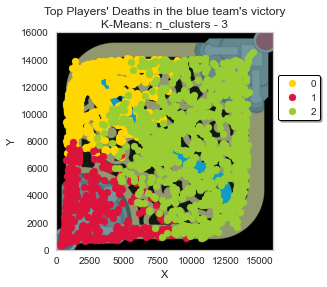

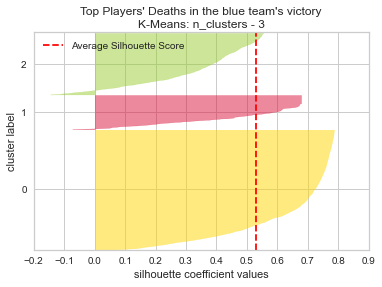

Silhouette score: 0.530659974468464
0    2530
2    1302
1     724
Name: cluster, dtype: int64

Inertia: 3728.4234973460666

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3044.537154,11892.821739,-0.819763
1,1,1939.501381,2268.415746,-0.501381
2,2,10462.182796,8086.956989,0.283410


In [157]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [152]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1592.578069,1478.506010,0.411212
1,1,2079.366658,2027.909130,0.669995
2,2,2617.910057,3497.606925,0.573628


In [153]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9470.0,752.0,14120.0,6826.0,1,-1
1,1,9785.0,335.0,7966.0,269.0,1,-1
2,2,14476.0,3030.0,14560.0,886.0,1,-1


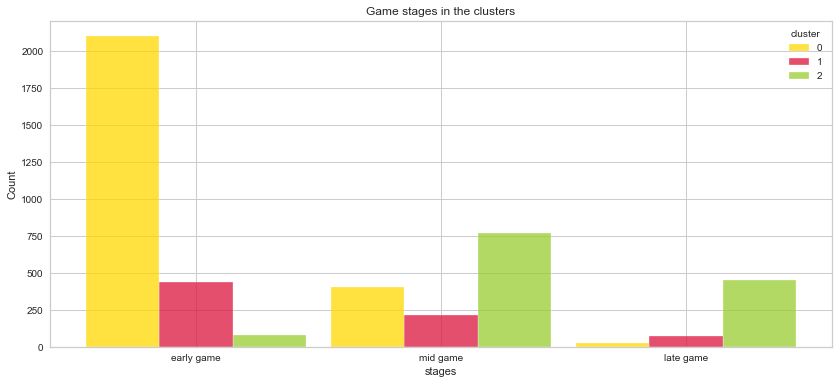

In [158]:
stagesPerClusterV2(blueSideVictory_df, colors)

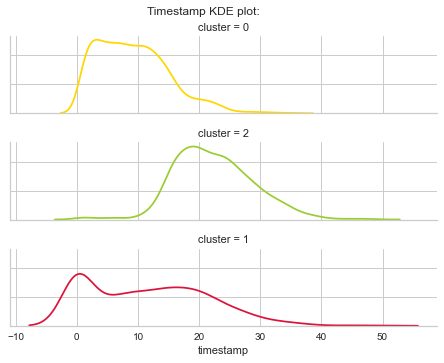

In [159]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

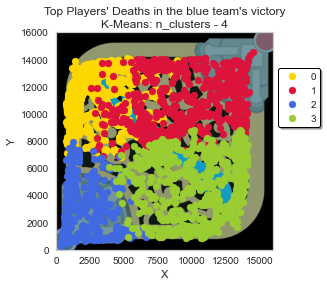

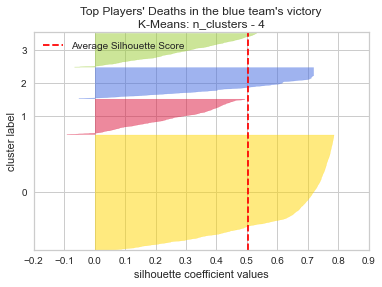

Silhouette score: 0.5048157978264463
0    2433
1     750
3     715
2     658
Name: cluster, dtype: int64

Inertia: 2946.3221443639372

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2919.082614,11868.312783,-0.856967
1,1,9608.473333,11150.869333,0.440000
2,2,1444.419453,2229.524316,-0.556231
3,3,10447.173427,4971.476923,0.074126


In [201]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "royalblue", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [202]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1469.424782,1468.281542,0.363922
1,1,2916.882977,1987.360322,0.512250
2,2,1364.208768,2054.790275,0.652816
3,3,2621.888757,2136.113369,0.566021


In [203]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8915.0,752.0,14120.0,6836.0,1,-1
1,1,14476.0,2578.0,14560.0,6866.0,1,-1
2,2,7084.0,335.0,7966.0,269.0,1,-1
3,3,14121.0,3924.0,8832.0,875.0,1,-1


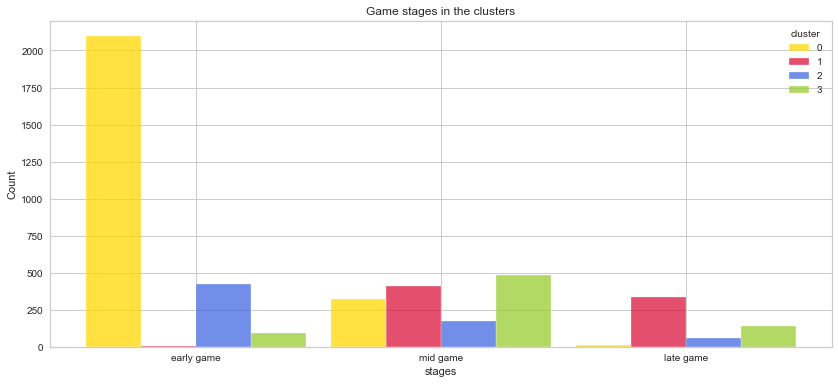

In [204]:
stagesPerClusterV2(blueSideVictory_df, colors)

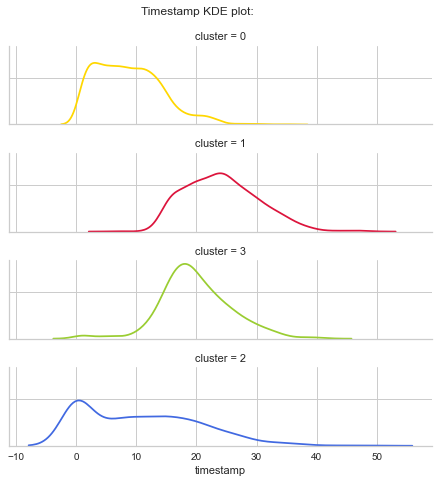

In [205]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [166]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Jayce,33
Jax,25
LeeSin,20
Fiora,10
Olaf,7
Renekton,7
Sion,7
Gangplank,6
Gnar,5
Cassiopeia,5


Deaths with each champion:

In [167]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce         860
Jax           595
LeeSin        506
Fiora         256
Olaf          219
Gangplank     188
Renekton      176
Sion          163
Gnar          148
Cassiopeia    134
Camille       122
Kled           99
KSante         91
Gragas         90
JarvanIV       80
Kayle          66
Tryndamere     61
Lucian         60
Kalista        53
Yone           46
Irelia         43
Sejuani        41
Sett           41
Graves         37
Garen          36
Alistar        35
Poppy          34
Malphite       32
Ryze           32
Ornn           31
Gwen           31
Akali          31
Nautilus       29
Pantheon       27
Vladimir       27
Rumble         19
Illaoi         17
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [168]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 37 champions when they won on the red side

Cluster 0 - died with 37 champions:
 ['Akali' 'Alistar' 'Camille' 'Cassiopeia' 'Fiora' 'Gangplank' 'Garen'
 'Gnar' 'Gragas' 'Graves' 'Gwen' 'Illaoi' 'Irelia' 'JarvanIV' 'Jax'
 'Jayce' 'KSante' 'Kalista' 'Kayle' 'Kled' 'LeeSin' 'Lucian' 'Malphite'
 'Nautilus' 'Olaf' 'Ornn' 'Pantheon' 'Poppy' 'Renekton' 'Rumble' 'Ryze'
 'Sejuani' 'Sett' 'Sion' 'Tryndamere' 'Vladimir' 'Yone']
Jayce         458
Jax           337
LeeSin        281
Fiora         153
Renekton       97
Gangplank      95
Sion           90
Olaf           89
Cassiopeia     70
Camille        69
Gnar           68
KSante         57
Kled           55
Gragas         50
Lucian         35
Kayle          34
Kalista        31
Yone           29
JarvanIV       29
Sejuani        27
Garen          26
Tryndamere     25
Irelia         22
Gwen           18
Poppy          17
Ryze           17
Graves         17
Alistar        16
Ornn           16
Pantheon       16
Nautilus    

---
### Clustering Blue Team Defeat

In [169]:
blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
7,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,4.001267,2711.0,13268.0,4.0,24.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273544,KR_6376015376,Blue,anonymous 20,kr,Sion,27.007217,6197.0,1176.0,16.0,226.0,...,11.0,7691.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273545,KR_6376015376,Blue,anonymous 20,kr,Sion,28.007767,2442.0,2669.0,16.0,229.0,...,11.0,9222.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273546,KR_6376015376,Blue,anonymous 20,kr,Sion,29.007900,2313.0,1651.0,16.0,234.0,...,12.0,10140.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273549,KR_6376015376,Blue,anonymous 20,kr,Sion,30.008167,6135.0,1973.0,17.0,236.0,...,321.0,11750.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [170]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [171]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

54.53547550144696

In [172]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 lost 7 matches on the blue side
anonymous 10 has an average of 23.714285714285715 deaths per game when losing on the blue side

anonymous 11 lost 10 matches on the blue side
anonymous 11 has an average of 27.7 deaths per game when losing on the blue side

anonymous 13 lost 6 matches on the blue side
anonymous 13 has an average of 22.833333333333332 deaths per game when losing on the blue side

anonymous 14 lost 4 matches on the blue side
anonymous 14 has an average of 24.75 deaths per game when losing on the blue side

anonymous 15 lost 19 matches on the blue side
anonymous 15 has an average of 25.94736842105263 deaths per game when losing on the blue side

anonymous 16 lost 18 matches on the blue side
anonymous 16 has an average of 25.333333333333332 deaths per game when losing on the blue side

anonymous 17 lost 12 matches on the blue side
anonymous 17 has an average of 27.5 deaths per game when losing on the blue side

anonymous 18 lost 3 matches on the blue side
anonym

In [173]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 203 matches in which the jungler died at least once
17 players died a total of 5465 times on the blue side
Defeat games on blue side contains an average of 26.92118226600985 deaths per game


In [174]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
0,554.0,581.0,0.000000
1,3177.0,8848.0,1.000300
2,2665.0,13301.0,2.000733
4,3352.0,13461.0,3.001000
7,2711.0,13268.0,4.001267
...,...,...,...
273544,6197.0,1176.0,27.007217
273545,2442.0,2669.0,28.007767
273546,2313.0,1651.0,29.007900
273549,6135.0,1973.0,30.008167


Time discretization

In [175]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].apply(float)
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [176]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [177]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [178]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [179]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
0,-1.050804,-1.717961,-1
1,-0.240210,0.123673,-1
2,-0.398435,1.115665,-1
4,-0.186129,1.151308,-1
7,-0.384220,1.108314,-1
...,...,...,...
273544,0.693070,-1.585413,1
273545,-0.467349,-1.252819,1
273546,-0.507215,-1.479598,1
273549,0.673910,-1.407866,1


In [180]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4627647773701539
Silhouette score for k=3: 0.507609524284406
Silhouette score for k=4: 0.4744382542800201
Silhouette score for k=5: 0.4743111891176017
Silhouette score for k=6: 0.44926828465037183
Silhouette score for k=7: 0.4502727315461064
Silhouette score for k=8: 0.37591859275669315
Silhouette score for k=9: 0.38295161045625187
Silhouette score for k=10: 0.4007513209565602
Silhouette score for k=11: 0.40721616466630267
Silhouette score for k=12: 0.41368909921226404
Silhouette score for k=13: 0.39488552604974697
Silhouette score for k=14: 0.38925947721039594
Silhouette score for k=15: 0.3924238999891148
Silhouette score for k=16: 0.40091378139831035
Silhouette score for k=17: 0.40331403484797274
Silhouette score for k=18: 0.41246276397624865
Silhouette score for k=19: 0.4152546988128574
Silhouette score for k=20: 0.4300537616079756
Silhouette score for k=25: 0.4409100573145616


K-Means with k = 3

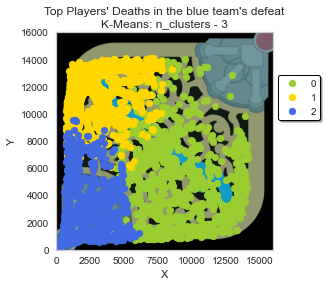

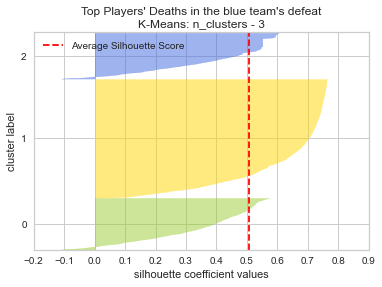

Silhouette score: 0.507609524284406
1    3001
0    1304
2    1160
Name: cluster, dtype: int64

Inertia: 4603.938747488118

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8764.292945,5237.303681,0.198620
1,1,2748.596135,11762.301233,-0.805398
2,2,1666.422414,2751.934483,-0.152586


In [181]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [182]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2539.150467,3110.260816,0.594941
1,1,1411.438895,1518.266413,0.429794
2,2,1387.944014,2399.550457,0.776815


In [183]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14127.0,4188.0,14026.0,756.0,1,-1
1,1,8521.0,733.0,14112.0,6086.0,1,-1
2,2,6110.0,138.0,9556.0,158.0,1,-1


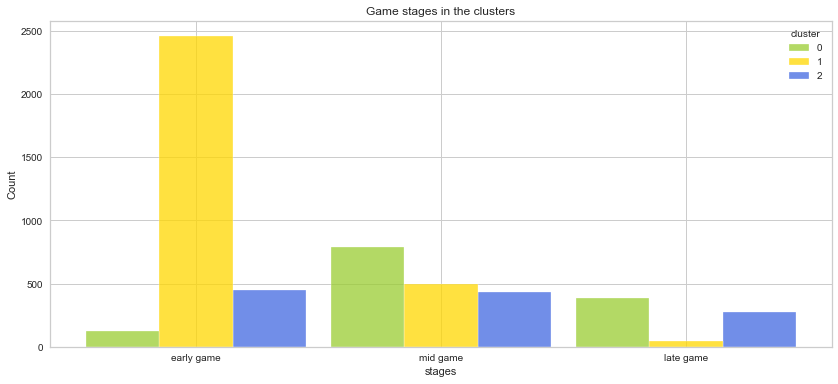

In [184]:
stagesPerClusterV2(blueSideDefeat_df, colors)

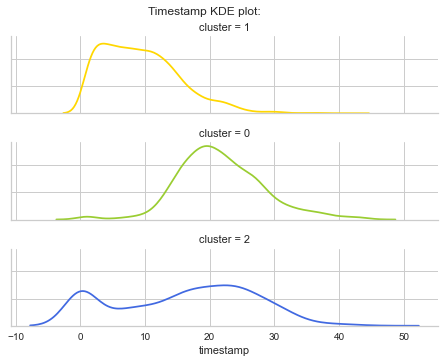

In [185]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [186]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Jax,28
Jayce,25
LeeSin,21
Sion,14
Gragas,11
Gangplank,11
Renekton,9
KSante,9
Fiora,8
Gnar,6


Deaths with each champion:

In [187]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce         697
Jax           666
LeeSin        589
Sion          359
Gangplank     301
Gragas        298
Renekton      238
KSante        228
Fiora         190
Gnar          162
Camille       134
Quinn          98
Kennen         91
Akshan         90
Irelia         89
Garen          76
Alistar        72
Ryze           69
Kayle          65
Gwen           64
Yone           63
Akali          63
Rumble         59
Kalista        52
Vladimir       51
JarvanIV       51
Ornn           45
Yasuo          36
Lillia         34
Kled           34
MonkeyKing     33
Urgot          32
Cassiopeia     30
Neeko          30
Lucian         30
Yorick         29
Viego          26
TahmKench      25
Chogath        25
Olaf           25
Aatrox         25
Vi             23
Tristana       21
Janna          21
Sylas          17
Shyvana         9
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [188]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 46 champions when they won on the red side

Cluster 0 - died with 45 champions:
 ['Aatrox' 'Akali' 'Akshan' 'Alistar' 'Camille' 'Cassiopeia' 'Chogath'
 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Gragas' 'Gwen' 'Irelia' 'Janna'
 'JarvanIV' 'Jax' 'Jayce' 'KSante' 'Kalista' 'Kayle' 'Kennen' 'Kled'
 'LeeSin' 'Lillia' 'Lucian' 'MonkeyKing' 'Neeko' 'Olaf' 'Ornn' 'Quinn'
 'Renekton' 'Rumble' 'Ryze' 'Sion' 'Sylas' 'TahmKench' 'Tristana' 'Urgot'
 'Vi' 'Viego' 'Vladimir' 'Yasuo' 'Yone' 'Yorick']
Jayce         172
LeeSin        149
Jax           115
Sion           86
Gragas         73
Gangplank      66
Camille        50
KSante         50
Renekton       48
Gnar           44
Quinn          36
Akshan         36
Fiora          35
Kennen         29
Alistar        25
Akali          23
Yasuo          23
Yone           20
Kayle          17
Gwen           16
Ryze           16
Kalista        14
Ornn           14
Garen          13
Rumble         13
Irelia         13
JarvanIV       11
Ur

---

### Blue Win Rate vs Red Win Rate

In [189]:
wins_df = top_deaths_df[top_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
322,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
323,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,1.000083,1325.0,10482.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
324,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,2.000550,1243.0,11151.0,1.0,3.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
326,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,3.001017,1651.0,11330.0,3.0,15.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
329,EUW1_6273568445,Blue,anonymous 3,euw1,Gnar,4.001400,823.0,10597.0,4.0,23.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273672,KR_6375996445,Red,anonymous 21,kr,Sion,34.009733,7550.0,7106.0,17.0,219.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273673,KR_6375996445,Red,anonymous 21,kr,Sion,35.009817,10388.0,13518.0,18.0,229.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273677,KR_6375996445,Red,anonymous 21,kr,Sion,36.009950,1858.0,5268.0,18.0,237.0,...,318.0,1965.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP
273679,KR_6375996445,Red,anonymous 21,kr,Sion,37.010150,2453.0,2976.0,18.0,238.0,...,618.0,1990.0,True,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [190]:
wins = len(np.unique(wins_df["gameId"]))
wins

444

In [191]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 60.58558558558559 vs Blue: 39.414414414414416


In [192]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 60.07011393514461 vs Blue: 39.92988606485539
